In [1]:
image = 'D:\repos\preprocessing-models-in-medical-images\medical_testsets\origin\COVID19_Pneumonia_Normal_Chest_Xray_PA\covid\004.jpeg'

In [4]:
# Manual upload an local image to predict
from keras.preprocessing import image
import tf_keras
import numpy as np

# # Upload the image
# uploaded = files.upload()

# # Load the image
# for fn in uploaded.keys():
#     path = fn
#     img = image.load_img(path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)

img = image.load_img('medical_testsets/pred_analysis/pred_img/unsharp_masking_bilateral_filter/Brain-Stroke-CT-Image-Dataset\Stroke/88 (16).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Now you can use the image array 'x' for prediction
model = tf_keras.models.load_model('models/09_07/09_07_05/best_model_val_acc.h5')
prediction = model.predict(x)

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=-1)

# Get the class names from the training dataset
# class_names = ['covid', 'normal', 'pneumonia']
class_names = ['Normal', 'Stroke']

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

print("Predicted class:", predicted_class_name)



1/1 [==============================] - 2s 2s/step
Predicted class: Normal


In [1]:
import numpy as np
print(np.argmax([0.5, 0.2, 0.1]))

0


### Copy

In [8]:
import os
import shutil

copy_files = [
    'malignant/malignant (1)-sharpened-sharpened-rotated2.png',
    'malignant/malignant (11)-rotated1-rotated2.png',
    'malignant/malignant (11)-rotated1-rotated32.png',
    'malignant/malignant (11)-rotated1-sharpened.png',
    'malignant/malignant (11)-rotated1.png',
    'malignant/malignant (11)-rotated32-rotated1.png',
    'malignant/malignant (11)-sharpened-rotated1.png',
    'malignant/malignant (11)-sharpened-rotated2.png',
    'malignant/malignant (11)-sharpened.png',
    'malignant/malignant (11).png',
    'malignant/malignant (12)-rotated2-rotated32.png',
    'malignant/malignant (12)-rotated2-sharpened.png',
]

source_path = r'medical_testsets\preprocessed\Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'
dest_path = r'medical_testsets\pred_analysis\pred_img\preprocessing_group\unsharp_masking_bilateral_filter\Ultrasound-Breast-Images-for-Breast-Cancer'

for file in copy_files:
    source_file = os.path.join(source_path, file)
    dest_file = os.path.join(dest_path, file)
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)
    shutil.copyfile(source_file, dest_file)
    print(f'copy "{source_file}" "{dest_file}"')

copy "medical_testsets\preprocessed\Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter\malignant/malignant (1)-sharpened-sharpened-rotated2.png" "medical_testsets\pred_analysis\pred_img\preprocessing_group\unsharp_masking_bilateral_filter\Ultrasound-Breast-Images-for-Breast-Cancer\malignant/malignant (1)-sharpened-sharpened-rotated2.png"
copy "medical_testsets\preprocessed\Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter\malignant/malignant (11)-rotated1-rotated2.png" "medical_testsets\pred_analysis\pred_img\preprocessing_group\unsharp_masking_bilateral_filter\Ultrasound-Breast-Images-for-Breast-Cancer\malignant/malignant (11)-rotated1-rotated2.png"
copy "medical_testsets\preprocessed\Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter\malignant/malignant (11)-rotated1-rotated32.png" "medical_testsets\pred_analysis\pred_img\preprocessing_group\unsharp_masking_bilateral_filter\Ultrasound-Breast-Images-for-Breast-Cance

### Class Activation Map (CAM)

In [1]:
import tensorflow as tf
import tf_keras
import numpy as np
import matplotlib.pyplot as plt

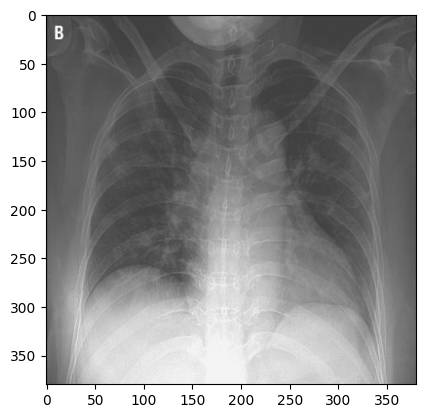

In [34]:
# Load a pre-trained model
model_path = 'models/01_07/01_07_01/best_model_val_acc.h5'
# model_path = 'models/01_07/01_07_02/best_model_val_acc.h5'
model = tf_keras.models.load_model(model_path)

class_names = ['covid', 'normal', 'pneumonia']

# Choose an image and preprocess it
def load_single_image(img, target_size=(224, 224), interpolation='bilinear', img_type='bytes'):
    """
    Args: imge_type: 'bytes' or 'file'

    prediction = model.predict(img)
    print(prediction)
    total_sum = tf.reduce_sum(img)
    print(f"The sum of all values in the image is: {total_sum.numpy()}")
    ```output
    [[0.5879362]]
    The sum of all values in the image is: 8400836.0
    ```
    """
    # Đọc ảnh và giải mã
    if img_type != 'bytes':
        img = tf.io.read_file(img) # Read image file

    img = tf.image.decode_image(img, channels=3, expand_animations=False)

    # Resize ảnh
    img = tf.image.resize(img, target_size, method=interpolation)

    # Đảm bảo dữ liệu ảnh có kiểu float32 (giống cách 2)
    img = tf.cast(img, tf.float32)

    # Mô phỏng batch size 1
    img = tf.expand_dims(img, axis=0)
    return img

# img_path = r'medical_testsets\pred_analysis\pred_img\dataset_group\Chest X-ray_COVID19_Pneumonia_Normal_Chest_Xray_PA\pneumonia\00019275_002.jpg'
# img_path = r'medical_testsets\pred_analysis\pred_img\dataset_group\Chest X-ray_COVID19_Pneumonia_Normal_Chest_Xray_PA\pneumonia\00028301_000.jpg'
img_path = r'medical_testsets\preprocessed\COVID19_Pneumonia_Normal_Chest_Xray_PA_Median\covid\006.jpg'

# img =  load_single_image(img_path, target_size=(224, 224), interpolation='bilinear', img_type='file')
img = load_single_image(img_path, target_size=(380, 380), interpolation='bilinear', img_type='file')

plt.imshow(img[0].numpy().astype("uint8"))

In [35]:
# Get the model's predictions
pred = model.predict(img)
pred_class = np.argmax(pred, axis=-1)
pred_class

1/1 [==============================] - 4s 4s/step


array([0], dtype=int64)

In [63]:
# Get the weights of the final dense layer
final_dense_layer = model.layers[-1]
final_dense_weights = final_dense_layer.get_weights()[0]

# Get the output of the last convolutional layer
last_conv_layer = model.layers[-5]
# last_conv_layer = model.get_layer('conv5_block3_3_conv')

last_conv_layer_model = tf_keras.Model(inputs=model.input, outputs=last_conv_layer.output)
last_conv_output = last_conv_layer_model.predict(img)

1/1 [==============================] - 4s 4s/step


(12, 12, 1)


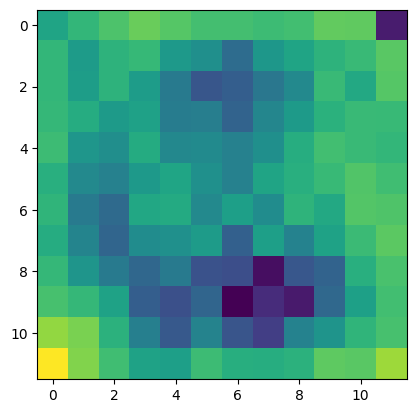

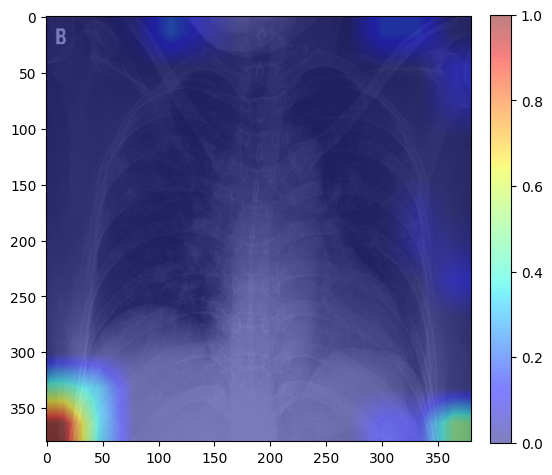

In [65]:
# Compute the CAM
cam = np.zeros(last_conv_output.shape[1:3], dtype=np.float32)
for i, w in enumerate(final_dense_weights[:, pred_class]):
    cam += w * last_conv_output[0, :, :, i]

# Add a dimension to cam to make it 3D
cam = np.expand_dims(cam, axis=-1)
print(cam.shape)
plt.imshow(cam[:, :, 0])

# Normalize the CAM
cam = np.maximum(cam, 0)
cam /= cam.max()
# cam = tf.image.resize(cam, (224, 224)).numpy()
cam = tf.image.resize(cam, (380, 380)).numpy()

# Remove the added dimension to make it 2D again
cam = np.squeeze(cam, axis=-1)

# Visualize the CAM
plt.figure(figsize=(6, 6))
plt.imshow(img[0].numpy().astype("uint8"))
heatmap = plt.imshow(cam, cmap='jet', alpha=0.5) # alpha: transparency of the heatmap
plt.colorbar(heatmap, fraction=0.046, pad=0.04) # fraction: size of the colorbar, pad: distance between colorbar and heatmap
plt.show()

In [62]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Define the Grad-CAM function
def plot_gradcam(model, img, class_index):
    # Create Gradcam object
    gradcam = Gradcam(model, model_modifier=ReplaceToLinear(), clone=True)

    # Create a score function
    score = CategoricalScore([class_index])

    # Specify the penultimate layer
    # penultimate_layer = model.layers[-7].name  # Use the name of the last convolutional layer
    # penultimate_layer = model.layers[-7]
    # penultimate_layer = 'top_conv'

    # Find the last convolutional layer
    for layer in reversed(model.layers):
        if isinstance(layer, tf_keras.layers.Conv2D):
            penultimate_layer = layer.name
            print(f"Penultimate layer: {penultimate_layer}")
            break

    if penultimate_layer is None:
        raise ValueError("No convolutional layer found in the model.")

    # Generate heatmap
    # cam = gradcam(score, img, penultimate_layer=-1)
    # cam = gradcam(score, img, penultimate_layer=penultimate_layer)

    # Create a sub-model that goes from the input to the penultimate layer
    # sub_model = tf_keras.Model(inputs=model.input, outputs=penultimate_layer.output)

    # Generate heatmap
    # cam = gradcam(score, img, penultimate_layer=sub_model.layers[-1].name)
    cam = gradcam(score, img, penultimate_layer=penultimate_layer)


    # Display heatmap
    heatmap = np.uint8(255 * cam[0])
    heatmap = np.squeeze(heatmap)

    plt.figure(figsize=(10, 10))
    plt.imshow(img[0].astype(np.uint8))
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.colorbar()
    plt.show()

# Plot Grad-CAM
plot_gradcam(model, img, pred_class)

Penultimate layer: top_conv


ValueError: Unable to determine penultimate `Conv` layer. `penultimate_layer`=top_conv

In [24]:
models = [
    'models/01_07/01_07_01/best_model_val_acc.h5',
    'models/01_07/01_07_02/best_model_val_acc.h5',
    'models/01_07/01_07_03/best_model_val_acc.h5',
    'models/01_07/01_07_04/best_model_val_acc.h5',
    'models/01_07/01_07_05/best_model_val_acc.h5',
]

for model in models:
    print(model)
    load_model = tf_keras.models.load_model(model)
    print(load_model.summary())

models/01_07/01_07_01/best_model_val_acc.h5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 380, 380, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 380, 380, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 380, 380, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 380, 380, 3)  

KeyboardInterrupt: 